In [9]:
import requests
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import datetime
import csv

In [10]:
API_KEY = '1a7041d4a76c46b49e354e4117b954ed'
BASE_URL = 'https://newsapi.org/v2/everything'

In [11]:
companies = ["Apple Inc.",
"Accenture plc",
"Adobe Inc.",
"Autodesk, Inc.",
"C3.ai, Inc.",
"Applied Materials, Inc.",
"Advanced Micro Devices, Inc.",
"Amazon.com, Inc.",
"Arista Networks, Inc.",
"ANSYS, Inc.",
"ASML Holding N.V.",
"Aurora Innovation, Inc.",
"Broadcom Inc.",
"The Boeing Company",
"Alibaba Group Holding Limited",
"BigBear.ai Holdings, Inc.",
"Baidu, Inc.",
"Barnwell Industries, Inc.",
"Cadence Design Systems, Inc.",
"Coursera, Inc.",
"Salesforce, Inc.",
"Cerence Inc.",
"CrowdStrike Holdings, Inc.",
"Deere & Company",
"Dynatrace, Inc.",
"Duos Technologies Group, Inc.",
"Enphase Energy, Inc.",
"Alphabet Inc.",
"Helix Energy Solutions Group, Inc.",
"International Business Machines Corporation",
"Innodata Inc.",
"Intel Corporation",
"Inuvo, Inc.",
"JD.com, Inc.",
"Johnson & Johnson",
"JPMorgan Chase & Co.",
"KLA Corporation",
"Remark Holdings, Inc.",
"Meta Platforms, Inc.",
"Microsoft Corporation",
"MicroStrategy Incorporated",
"Micron Technology, Inc.",
"Netflix, Inc.",
"ServiceNow, Inc.",
"NVIDIA Corporation",
"Invitae Corporation",
"Oblong, Inc.",
"Oracle Corporation",
"Palo Alto Networks, Inc.",
"UiPath Inc.",
"Palantir Technologies Inc.",
"PROS Holdings, Inc.",
"QUALCOMM Incorporated",
"QuickLogic Corporation",
"SentinelOne, Inc.",
"SAP SE",
"Snowflake Inc.",
"Synopsys, Inc.",
"SoundHound AI, Inc.",
"Sphere Entertainment Co.",
"Splunk Inc.",
"Semantix, Inc.",
"Symbotic Inc.",
"Tesla, Inc.",
"Taiwan Semiconductor Manufacturing Company Limited",
"Take-Two Interactive Software, Inc.",
"Texas Instruments Incorporated",
"Uber Technologies, Inc.",
"Upstart Holdings, Inc.",
"Veritone, Inc.",
"Verisk Analytics, Inc.",
"Exxon Mobil Corporation"]

In [12]:
#keywords = ["buy", "sell"]

sia = SentimentIntensityAnalyzer()

company_sentiments = []

In [13]:
for company in companies:
    params = {
        'q': company,
        'apiKey': API_KEY
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    if data['status'] == 'ok':
        articles = data['articles']
        sentiments = []
        for article in articles:
            title = article['title']
            description = article['description']

            if title and description:
                sentiment_score = sia.polarity_scores(description)['compound']
                sentiments.append(sentiment_score)

        if sentiments:
            average_sentiment = sum(sentiments) / len(sentiments)
            company_sentiments.append((company, average_sentiment))
    else:
        print('Error occurred:', data['message'])

Error occurred: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.
Error occurred: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.
Error occurred: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.
Error occurred: You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.
Error occurred: You have made too many requests recently. Developer accounts are limited to 100 requests

In [27]:
# Sort
company_sentiments.sort(key=lambda x: x[1], reverse=True)

# Prepare data 
companies_sorted = [item[0] for item in company_sentiments]
sentiments_sorted = [item[1] for item in company_sentiments]

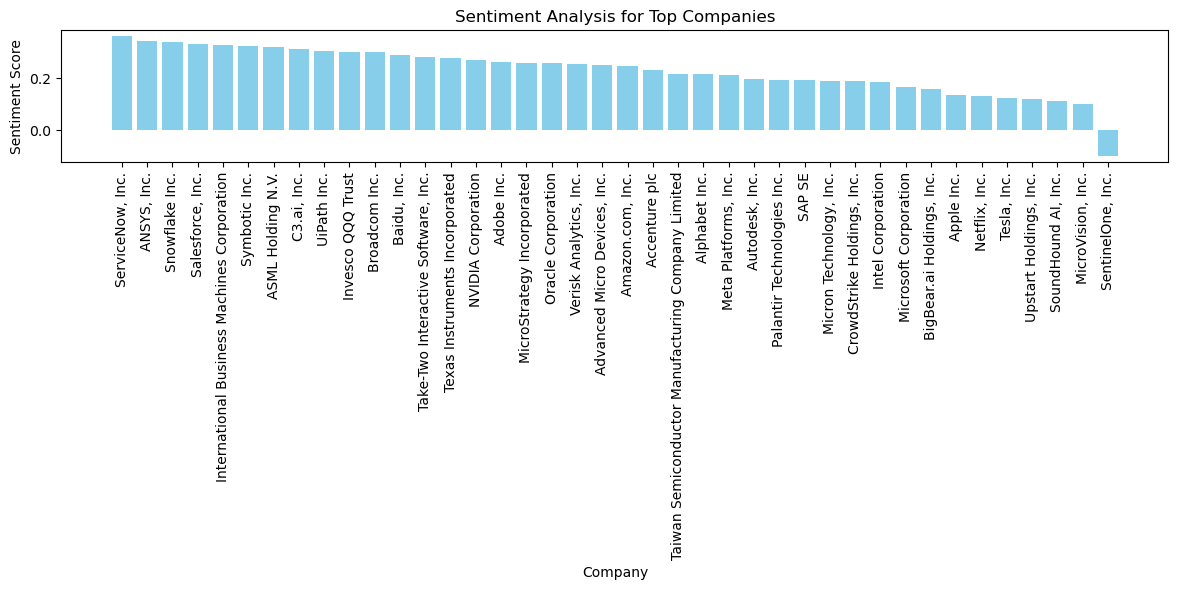

In [28]:
plt.figure(figsize=(12, 6))
plt.bar(companies_sorted, sentiments_sorted, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis for Top Companies')
plt.tight_layout()
plt.show()

In [29]:
print("Sentiment Analysis Results:")
for company, sentiment_score in company_sentiments:
    print(f"{company}: Sentiment Score = {sentiment_score:.2f}")

Sentiment Analysis Results:
ServiceNow, Inc.: Sentiment Score = 0.36
ANSYS, Inc.: Sentiment Score = 0.34
Snowflake Inc.: Sentiment Score = 0.34
Salesforce, Inc.: Sentiment Score = 0.33
International Business Machines Corporation: Sentiment Score = 0.33
Symbotic Inc.: Sentiment Score = 0.32
ASML Holding N.V.: Sentiment Score = 0.32
C3.ai, Inc.: Sentiment Score = 0.31
UiPath Inc.: Sentiment Score = 0.31
Invesco QQQ Trust: Sentiment Score = 0.30
Broadcom Inc.: Sentiment Score = 0.30
Baidu, Inc.: Sentiment Score = 0.29
Take-Two Interactive Software, Inc.: Sentiment Score = 0.28
Texas Instruments Incorporated: Sentiment Score = 0.28
NVIDIA Corporation: Sentiment Score = 0.27
Adobe Inc.: Sentiment Score = 0.26
MicroStrategy Incorporated: Sentiment Score = 0.26
Oracle Corporation: Sentiment Score = 0.26
Verisk Analytics, Inc.: Sentiment Score = 0.25
Advanced Micro Devices, Inc.: Sentiment Score = 0.25
Amazon.com, Inc.: Sentiment Score = 0.25
Accenture plc: Sentiment Score = 0.23
Taiwan Semico

In [8]:
csv_file = 'sentiment_analysis_results.csv'
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Company', 'Sentiment Score'])
    for company, sentiment_score in company_sentiments:
        writer.writerow([company, sentiment_score])